In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_average_stresslevel_diagnosis_per_age = pd.read_csv("https://raw.githubusercontent.com/cemanzanoc/Sleephours-and-Lifestyle/refs/heads/main/data_queries_celia/1.1_avgstresslevel_diagnosis_groupbyagerange_count.csv")
df_average_stresslevel_occupation_per_age = pd.read_csv("https://raw.githubusercontent.com/cemanzanoc/Sleephours-and-Lifestyle/refs/heads/main/data_queries_celia/1.2_avgstresslevel_occupatio_groupedbyagerange.csv")
df_diagnosis_gender_per_age = pd.read_csv("https://raw.githubusercontent.com/cemanzanoc/Sleephours-and-Lifestyle/refs/heads/main/data_queries_celia/2_diagnosis_gender_groupbyagerange.csv")

In [6]:
df_average_stresslevel_diagnosis_per_age

,age_range,diagnosis,diagnosis_count,avg_stress
0,0-18,Major Depressive Disorder,1,10.00
1,0-18,Panic Disorder,5,8.00
2,0-18,Generalized Anxiety,1,8.00
3,0-18,Bipolar Disorder,5,7.20
4,19-35,Generalized Anxiety,56,7.68
5,19-35,Panic Disorder,55,7.64
6,19-35,Bipolar Disorder,49,7.61
7,19-35,Major Depressive Disorder,53,7.26
8,36-50,Major Depressive Disorder,43,7.84
9,36-50,Panic Disorder,30,7.83


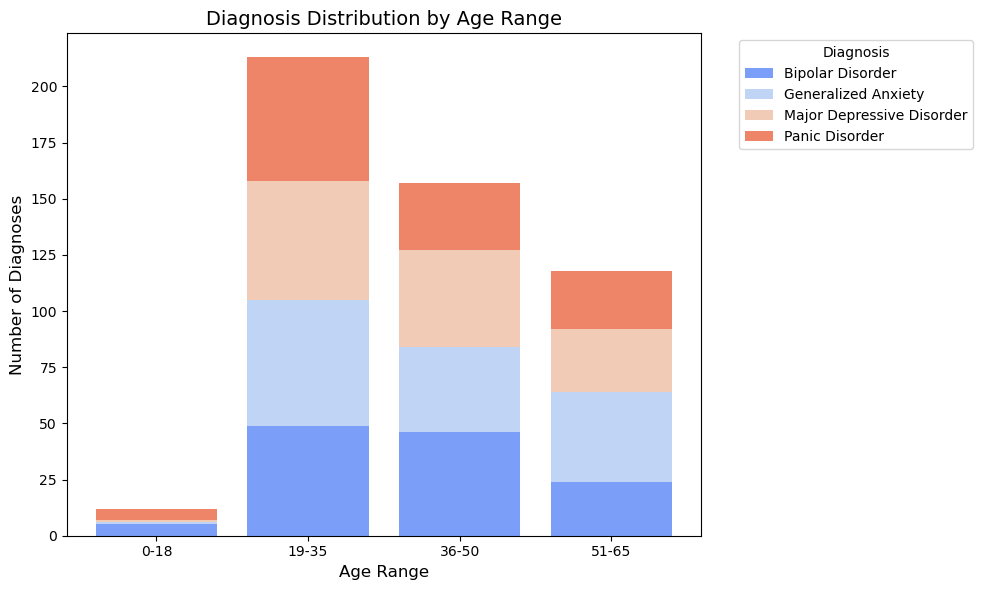

In [19]:
pivot_df = df_average_stresslevel_diagnosis_per_age.pivot_table(
    index='age_range', 
    columns='diagnosis', 
    values='diagnosis_count', 
    aggfunc='sum'
)

# Crear la paleta de colores
colors = sns.color_palette("coolwarm", len(pivot_df.columns))

# Crear el gráfico apilado
fig, ax = plt.subplots(figsize=(10, 6))

bottom_values = None
for i, col in enumerate(pivot_df.columns):
    ax.bar(
        pivot_df.index,  # Rango de edad
        pivot_df[col],  # Conteo de diagnósticos
        bottom=bottom_values,  # Apilar sobre el valor anterior
        label=col,  # Etiqueta para la leyenda
        color=colors[i]  # Color para cada diagnóstico
    )
    
    bottom_values = pivot_df[col] if bottom_values is None else bottom_values + pivot_df[col]

# Títulos y etiquetas
ax.set_title("Diagnosis Distribution by Age Range", fontsize=14)
ax.set_xlabel("Age Range", fontsize=12)
ax.set_ylabel("Number of Diagnoses", fontsize=12)
ax.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [7]:
df_average_stresslevel_occupation_per_age

,age_range,occupation,occupation_count,avg_stress
0,19-35,Sales Representative,2,8.00
1,19-35,Doctor,65,7.02
2,19-35,Scientist,4,7.00
3,19-35,Nurse,5,6.40
4,19-35,Software Engineer,4,6.00
5,19-35,Teacher,3,5.67
6,19-35,Accountant,2,5.00
7,19-35,Lawyer,1,5.00
8,19-35,Engineer,8,3.75
9,36-50,Nurse,31,7.81


In [9]:
df_diagnosis_gender_per_age

,diagnosis,gender,num_patients,age_range
0,Bipolar Disorder,Female,3,0-18
1,Bipolar Disorder,Male,2,0-18
2,Bipolar Disorder,Female,24,19-35
3,Bipolar Disorder,Male,25,19-35
4,Bipolar Disorder,Female,19,36-50
5,Bipolar Disorder,Male,27,36-50
6,Bipolar Disorder,Female,14,51-65
7,Bipolar Disorder,Male,10,51-65
8,Generalized Anxiety,Male,1,0-18
9,Generalized Anxiety,Female,19,19-35


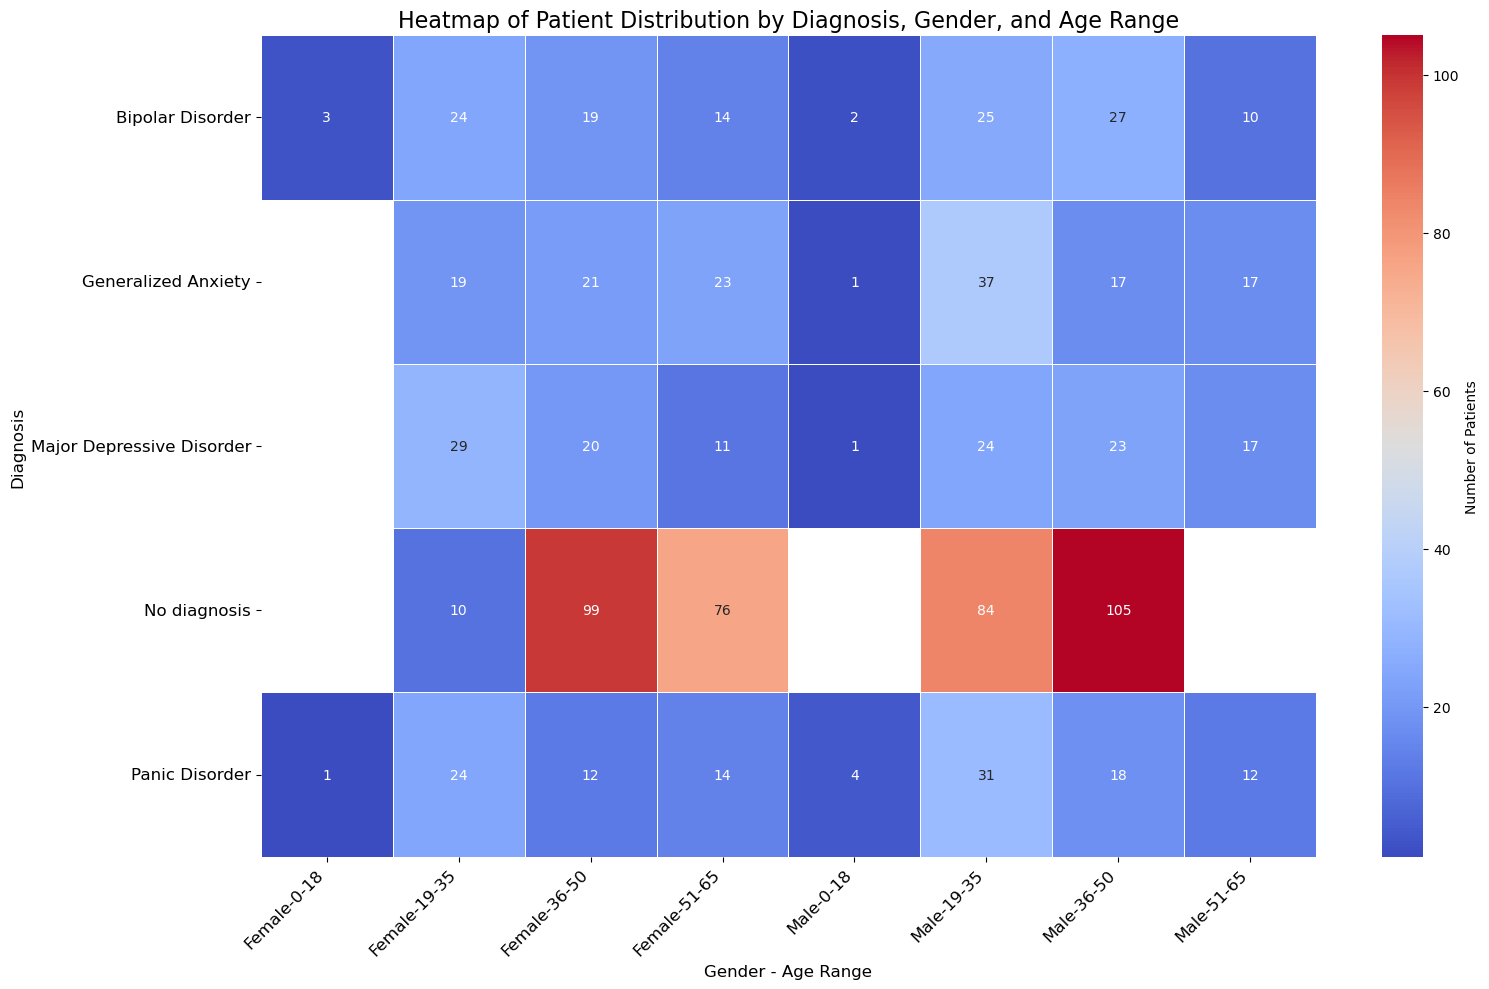

In [22]:
# Supongamos que ya tienes el DataFrame llamado df_diagnosis_gender_per_age
# df_diagnosis_gender_per_age = ...

# Pivotar los datos para que las columnas sean combinaciones de gender y age_range
pivot_df = df_diagnosis_gender_per_age.pivot_table(
    index='diagnosis', 
    columns=['gender', 'age_range'], 
    values='num_patients', 
    aggfunc='sum'
)

# Crear el heatmap
plt.figure(figsize=(16, 10))  # Aumentamos el tamaño del gráfico
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt="g", cbar_kws={'label': 'Number of Patients'}, linewidths=0.5, annot_kws={"size": 10})

# Rotar las etiquetas de los ejes para que no se sobrepongan
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Títulos y etiquetas
plt.title("Heatmap of Patient Distribution by Diagnosis, Gender, and Age Range", fontsize=16)
plt.xlabel("Gender - Age Range", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)

# Ajustar el diseño para evitar que los elementos se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()

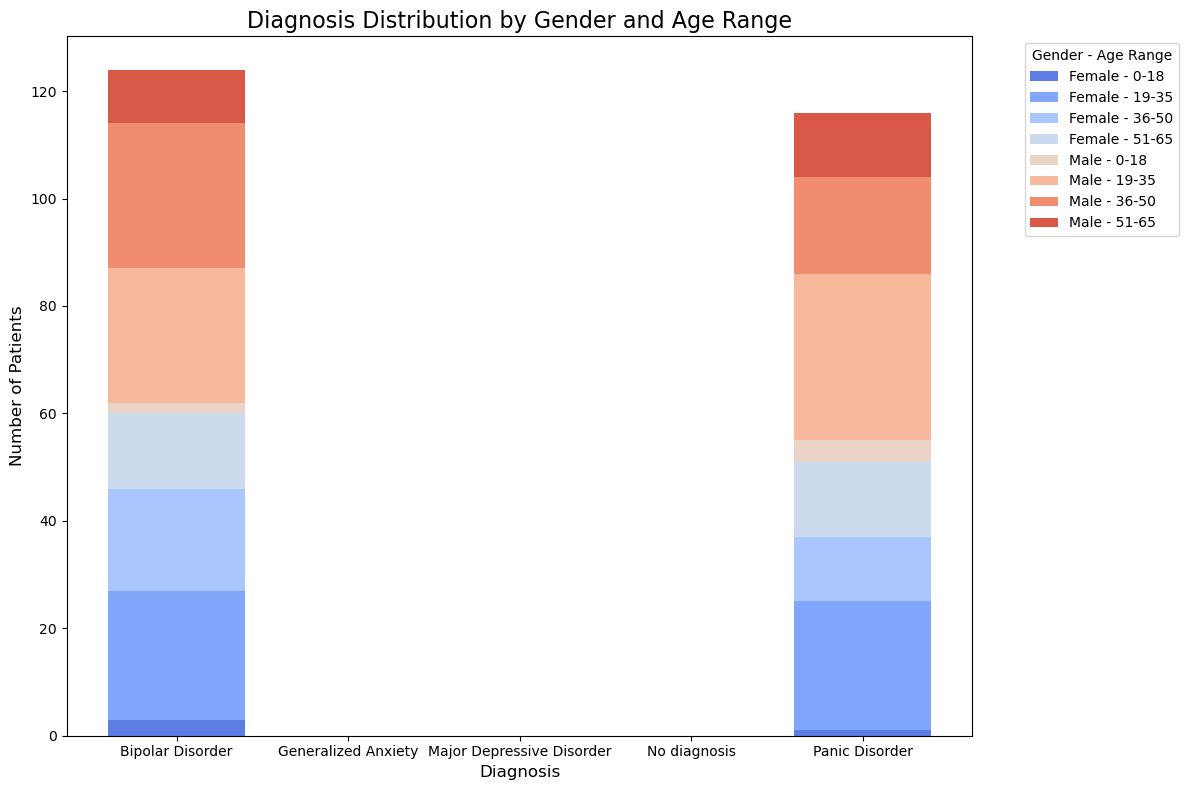

In [23]:
# Crear una tabla pivote con los valores de número de pacientes
pivot_df = df_diagnosis_gender_per_age.pivot_table(
    index='diagnosis', 
    columns=['gender', 'age_range'], 
    values='num_patients', 
    aggfunc='sum'
)

# Crear la paleta de colores
colors = sns.color_palette("coolwarm", len(pivot_df.columns))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = None
for i, col in enumerate(pivot_df.columns):
    ax.bar(
        pivot_df.index,  # Diagnóstico
        pivot_df[col],  # Número de pacientes
        bottom=bottom_values,  # Apilar sobre el valor anterior
        label=f"{col[0]} - {col[1]}",  # Combina gender y age_range para la leyenda
        color=colors[i]  # Asignar color para cada combinación de gender y age_range
    )
    bottom_values = pivot_df[col] if bottom_values is None else bottom_values + pivot_df[col]

# Títulos y etiquetas
ax.set_title("Diagnosis Distribution by Gender and Age Range", fontsize=16)
ax.set_xlabel("Diagnosis", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)
ax.legend(title="Gender - Age Range", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

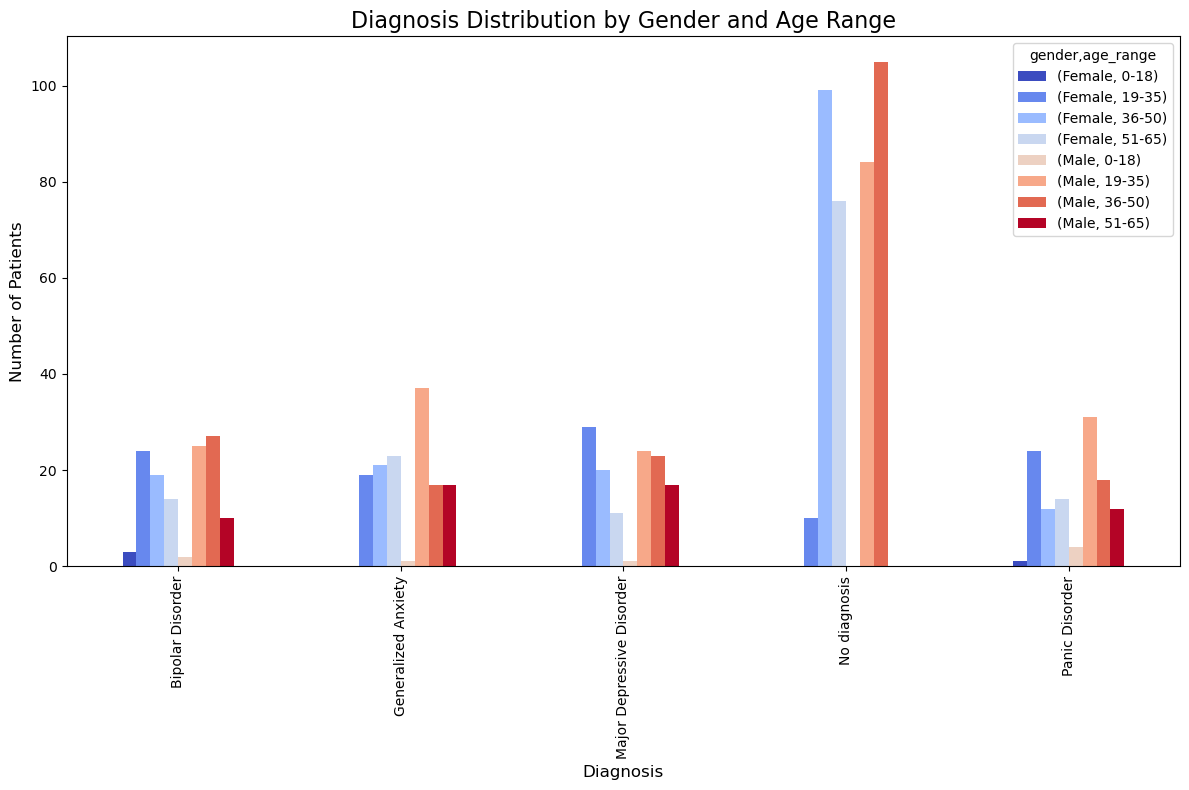

In [24]:
# Crear una tabla pivote con los valores de número de pacientes
pivot_df = df_diagnosis_gender_per_age.pivot_table(
    index='diagnosis', 
    columns=['gender', 'age_range'], 
    values='num_patients', 
    aggfunc='sum'
)

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))
pivot_df.plot(kind='bar', ax=ax, stacked=False, colormap="coolwarm", figsize=(12, 8))

# Títulos y etiquetas
ax.set_title("Diagnosis Distribution by Gender and Age Range", fontsize=16)
ax.set_xlabel("Diagnosis", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [26]:
df_medication_diagnosis = pd.read_csv("https://raw.githubusercontent.com/cemanzanoc/Sleephours-and-Lifestyle/refs/heads/main/data_queries_celia/4.Medication_for_each_diagnosis.csv")

In [27]:
df_medication_diagnosis

,diagnosis,medication,patient_count
0,Bipolar Disorder,Antipsychotics,25
1,Bipolar Disorder,Mood Stabilizers,23
2,Bipolar Disorder,Antidepressants,22
3,Bipolar Disorder,Benzodiazepines,22
4,Bipolar Disorder,Anxiolytics,16
5,Bipolar Disorder,SSRIs,16
6,Generalized Anxiety,Mood Stabilizers,28
7,Generalized Anxiety,SSRIs,25
8,Generalized Anxiety,Antipsychotics,23
9,Generalized Anxiety,Benzodiazepines,22


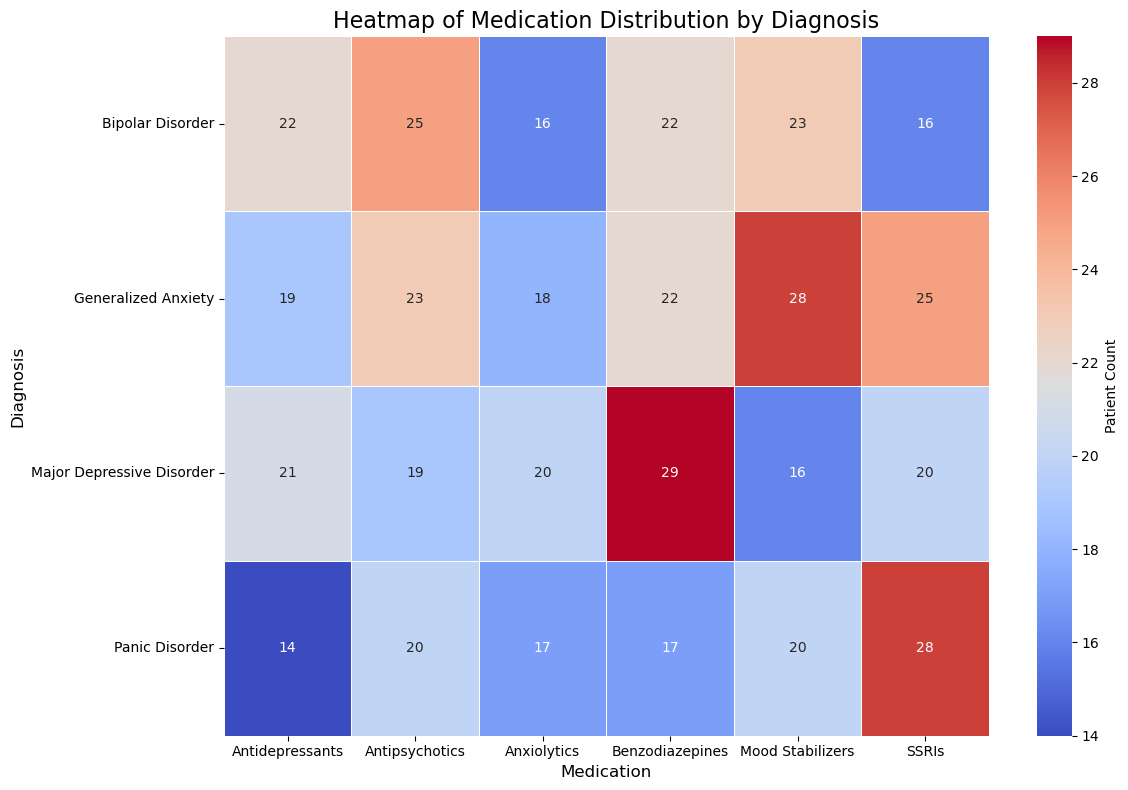

In [28]:
# Pivotar los datos para obtener un DataFrame adecuado para el heatmap
pivot_df = df_medication_diagnosis.pivot_table(
    index='diagnosis',   # Diagnóstico como filas
    columns='medication', # Medicación como columnas
    values='patient_count', # Número de pacientes como valores
    aggfunc='sum'         # Sumar en caso de tener múltiples entradas
)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt="g", cbar_kws={'label': 'Patient Count'}, linewidths=0.5)

# Títulos y etiquetas
plt.title("Heatmap of Medication Distribution by Diagnosis", fontsize=16)
plt.xlabel("Medication", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [3]:
df_physical_level_vs_sleep_quality = pd.read_csv("https://raw.githubusercontent.com/cemanzanoc/Sleephours-and-Lifestyle/refs/heads/main/data_queries_celia/5.Physical_activity_vs_sleep%20quality.csv")

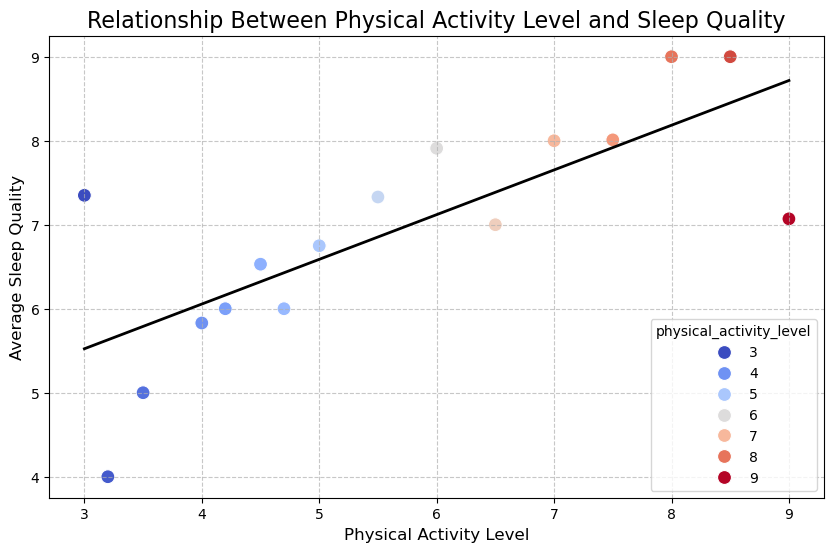

In [4]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Usamos seaborn para crear un gráfico de dispersión con una paleta de colores
sns.scatterplot(
    data=df_physical_level_vs_sleep_quality,
    x="physical_activity_level",
    y="average_sleep_quality",
    hue="physical_activity_level",
    palette="coolwarm",
    s=100
)

# Agregar una banda o "shade" que rellene el área entre las curvas
sns.regplot(
    data=df_physical_level_vs_sleep_quality,
    x="physical_activity_level",
    y="average_sleep_quality",
    scatter=False,
    color="gray",
    ci=None,
    line_kws={"color": "black", "linewidth": 2}
)

# Añadir etiquetas y título
plt.title("Relationship Between Physical Activity Level and Sleep Quality", fontsize=16)
plt.xlabel("Physical Activity Level", fontsize=12)
plt.ylabel("Average Sleep Quality", fontsize=12)

# Mostrar el gráfico con líneas de cuadrícula
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()